In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('heart_disease_cleaned.csv')
df.head()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

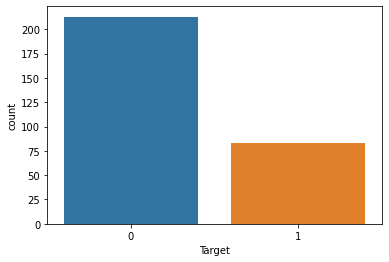

In [31]:
sns.countplot(df["Target"])

- Want to make sure to minimize false negatives (Classifying somebody as not at risk when they may be at risk) when dealing with disease classification.

In [24]:
df["Target"] = df["Target"].replace([1], 0)

In [27]:
df["Target"] = df["Target"].replace([2], 1)

In [29]:
df["Target"] = df["Target"].replace([3], 1)

In [30]:
df["Target"] = df["Target"].replace([4], 1)

In [43]:
df.head()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [41]:
# First I want to visualize the data using Principal Component Analysis (PCA)

In [92]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

#Data is now scaled and labeled (scaled_data)

In [123]:
pca = PCA(n_components=7)

In [124]:
pca.fit(scaled_data)

PCA(n_components=7)

In [125]:
x_pca = pca.transform(scaled_data)

In [126]:
scaled_data.shape

(296, 14)

In [127]:
x_pca.shape

(296, 7)

In [128]:
# We have reduced the 18 dimensions to two
# Now lets plot the data

Text(0, 0.5, 'Second Principal Component')

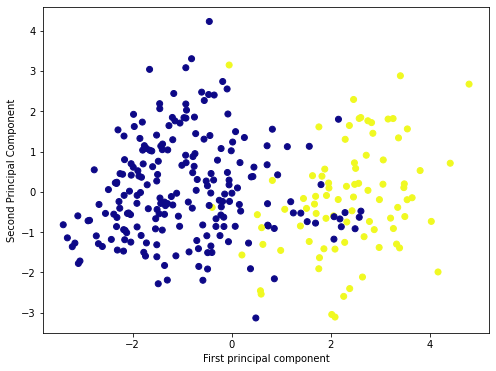

In [129]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [130]:
# Next is to figure out which features correlate with the principle component itself.

In [131]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25733315, 0.11563656, 0.08912419, 0.08077649, 0.07090277,
       0.06301989, 0.0602449 ])

In [132]:
# The first component contributes 25%, and the second component contributes 11% of explained variance, the third about 9%

In [133]:
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [136]:
pca_df = pd.DataFrame(["", 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], columns=["PC"])
explained_variance_df = pd.DataFrame(explained_variance, columns=["Explained Variance"])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=["Cumulative Variance"])

In [137]:
df_explained_variance = pd.concat([pca_df, explained_variance_df, cumulative_variance_df], axis = 1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.257333,0.257
2,PC2,0.115637,0.373
3,PC3,0.089124,0.462
4,PC4,0.080776,0.543
5,PC5,0.070903,0.614
6,PC6,0.063020,0.677
7,PC7,0.060245,0.737


In [138]:
# 7 components make up 73.7% of the variation in the dataset
# Lets move on to logistic regression

In [142]:
df_scaled = pd.DataFrame(scaled_data, columns = df.columns)

In [145]:
X = df.drop("Target", axis = 1)
y = df["Target"]

X_scaled = df_scaled.drop("Target", axis = 1)
y_scaled = df_scaled["Target"]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [151]:
# Support Vector Machines
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Logistic Regression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)

# Decision Tree
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

# Random Forest
rfc_model = RandomForestClassifier(n_estimators = 50)
rfc_model.fit(X_train, y_train)

# Naive Bayes
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

# Note none of these models require normilization

GaussianNB()

In [154]:
svc_predictions = svc_model.predict(X_test)
logmodel_predictions = logmodel.predict(X_test)
dtree_predictions = dtree_model.predict(X_test)
rfc_predictions = rfc_model.predict(X_test)
bayes_predictions = bayes_model.predict(X_test)

In [153]:
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_auc_score, roc_curve

In [ ]:
svc_auc = roc_auc_score(y)

In [159]:
print("    ---------Support Vector Machines------------")
print(classification_report(y_test, svc_predictions))
print("AUROC: ", roc_auc_score(y_test, svc_predictions))
print('\n')

print("    ----------Logistic Regression---------------")
print(classification_report(y_test, logmodel_predictions))
print("AUROC: ", roc_auc_score(y_test, logmodel_predictions))
print('\n')

print("    ------------Decision Tree----------------")
print(classification_report(y_test, dtree_predictions))
print("AUROC: ", roc_auc_score(y_test, dtree_predictions))
print('\n')

print("    ---------Random Forest Classifier----------")
print(classification_report(y_test, rfc_predictions))
print("AUROC: ", roc_auc_score(y_test, rfc_predictions))
print('\n')

print("    --------------Naive Bayes---------------------")
print(classification_report(y_test, bayes_predictions))
print("AUROC: ", roc_auc_score(y_test, bayes_predictions))

    ---------Support Vector Machines------------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        66
           1       0.00      0.00      0.00        23

    accuracy                           0.74        89
   macro avg       0.37      0.50      0.43        89
weighted avg       0.55      0.74      0.63        89

AUROC:  0.5


    ----------Logistic Regression---------------
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.73      0.83      0.78        23

    accuracy                           0.88        89
   macro avg       0.83      0.86      0.85        89
weighted avg       0.88      0.88      0.88        89

AUROC:  0.8600131752305666


    ------------Decision Tree----------------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        66
           1       0.46      0.48      0.47       

/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
plt.plot()

plt.title("ROC Plot")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

AUROC:  (array([0.        , 0.15151515, 1.        ]), array([0.        , 0.91304348, 1.        ]), array([2, 1, 0]))
